**Import statements**


In [4]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import numpy as np
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

import constants
import functions

%matplotlib inline

**Load Data**

In [5]:
all_static_data = functions.load_static_sensors()
all_static_data = functions.transform_to_grid_coordinates(all_static_data)
mobile_sensor_data = functions.load_mobile_sensors()
mobile_sensor_data = functions.transform_to_grid_coordinates(mobile_sensor_data)

**Compute predictions for stationary sensors**

In [6]:
par_grid = functions.create_par()
start_time = '2018-07-03 00:00:00'
end_time = '2018-07-03 13:45:00'
window = 15
timeint, par_grid = functions.train(all_static_data, mobile_sensor_data, start_time, end_time, par_grid, window)
print (timeint)

54


In [7]:
mae = []
mse = []
squares = []

start_window = '2018-07-06 14:00:00'
end_window = '2018-07-06 14:15:00'
offset_timeint = 1
number_of_windows = 6
window = 15
start_time = '2018-07-03 00:00:00'
par_grid = functions.create_par()
timeint_on_first_window = 0
for i in range(1, number_of_windows+1):
    end_time = start_window
    timeint, par_grid = functions.train(all_static_data, mobile_sensor_data, start_time, end_time, par_grid, window, timeint_on_first_window, verbose = True)
    to_test = functions.test_mobile(par_grid, timeint, mobile_sensor_data, start_window, end_window, 1)
    squares.append(to_test.shape[0])
    mae.append(mean_absolute_error(to_test['PM2.5'], to_test['pred_PM2.5']))
    mse.append(mean_squared_error(to_test['PM2.5'], to_test['pred_PM2.5']))
    start_time = end_time
    start_window = (datetime.strptime(start_window, '%Y-%m-%d %H:%M:%S') + timedelta(minutes=15)).strftime("%Y-%m-%d %H:%M:%S")
    end_window = (datetime.strptime(end_window, '%Y-%m-%d %H:%M:%S') + timedelta(minutes=15)).strftime("%Y-%m-%d %H:%M:%S")
    timeint_on_first_window = timeint+1
    

Inside while loop with timeint = 0
start_window = 2018-07-03 00:00:00
end_window = 2018-07-03 00:15:00
Inside while loop with timeint = 1
start_window = 2018-07-03 00:15:00
end_window = 2018-07-03 00:30:00
Inside while loop with timeint = 2
start_window = 2018-07-03 00:30:00
end_window = 2018-07-03 00:45:00
Inside while loop with timeint = 3
start_window = 2018-07-03 00:45:00
end_window = 2018-07-03 01:00:00
Inside while loop with timeint = 4
start_window = 2018-07-03 01:00:00
end_window = 2018-07-03 01:15:00
Inside while loop with timeint = 5
start_window = 2018-07-03 01:15:00
end_window = 2018-07-03 01:30:00
Inside while loop with timeint = 6
start_window = 2018-07-03 01:30:00
end_window = 2018-07-03 01:45:00
Inside while loop with timeint = 7
start_window = 2018-07-03 01:45:00
end_window = 2018-07-03 02:00:00
Inside while loop with timeint = 8
start_window = 2018-07-03 02:00:00
end_window = 2018-07-03 02:15:00
Inside while loop with timeint = 9
start_window = 2018-07-03 02:15:00
end

Inside while loop with timeint = 79
start_window = 2018-07-03 19:45:00
end_window = 2018-07-03 20:00:00
Inside while loop with timeint = 80
start_window = 2018-07-03 20:00:00
end_window = 2018-07-03 20:15:00
Inside while loop with timeint = 81
start_window = 2018-07-03 20:15:00
end_window = 2018-07-03 20:30:00
Inside while loop with timeint = 82
start_window = 2018-07-03 20:30:00
end_window = 2018-07-03 20:45:00
Inside while loop with timeint = 83
start_window = 2018-07-03 20:45:00
end_window = 2018-07-03 21:00:00
Inside while loop with timeint = 84
start_window = 2018-07-03 21:00:00
end_window = 2018-07-03 21:15:00
Inside while loop with timeint = 85
start_window = 2018-07-03 21:15:00
end_window = 2018-07-03 21:30:00
Inside while loop with timeint = 86
start_window = 2018-07-03 21:30:00
end_window = 2018-07-03 21:45:00
Inside while loop with timeint = 87
start_window = 2018-07-03 21:45:00
end_window = 2018-07-03 22:00:00
Inside while loop with timeint = 88
start_window = 2018-07-03 22

Inside while loop with timeint = 158
start_window = 2018-07-04 15:30:00
end_window = 2018-07-04 15:45:00
Inside while loop with timeint = 159
start_window = 2018-07-04 15:45:00
end_window = 2018-07-04 16:00:00
Inside while loop with timeint = 160
start_window = 2018-07-04 16:00:00
end_window = 2018-07-04 16:15:00
Inside while loop with timeint = 161
start_window = 2018-07-04 16:15:00
end_window = 2018-07-04 16:30:00
Inside while loop with timeint = 162
start_window = 2018-07-04 16:30:00
end_window = 2018-07-04 16:45:00
Inside while loop with timeint = 163
start_window = 2018-07-04 16:45:00
end_window = 2018-07-04 17:00:00
Inside while loop with timeint = 164
start_window = 2018-07-04 17:00:00
end_window = 2018-07-04 17:15:00
Inside while loop with timeint = 165
start_window = 2018-07-04 17:15:00
end_window = 2018-07-04 17:30:00
Inside while loop with timeint = 166
start_window = 2018-07-04 17:30:00
end_window = 2018-07-04 17:45:00
Inside while loop with timeint = 167
start_window = 201

Inside while loop with timeint = 237
start_window = 2018-07-05 11:15:00
end_window = 2018-07-05 11:30:00
Inside while loop with timeint = 238
start_window = 2018-07-05 11:30:00
end_window = 2018-07-05 11:45:00
Inside while loop with timeint = 239
start_window = 2018-07-05 11:45:00
end_window = 2018-07-05 12:00:00
Inside while loop with timeint = 240
start_window = 2018-07-05 12:00:00
end_window = 2018-07-05 12:15:00
Inside while loop with timeint = 241
start_window = 2018-07-05 12:15:00
end_window = 2018-07-05 12:30:00
Inside while loop with timeint = 242
start_window = 2018-07-05 12:30:00
end_window = 2018-07-05 12:45:00
Inside while loop with timeint = 243
start_window = 2018-07-05 12:45:00
end_window = 2018-07-05 13:00:00
Inside while loop with timeint = 244
start_window = 2018-07-05 13:00:00
end_window = 2018-07-05 13:15:00
Inside while loop with timeint = 245
start_window = 2018-07-05 13:15:00
end_window = 2018-07-05 13:30:00
Inside while loop with timeint = 246
start_window = 201

Inside while loop with timeint = 317
start_window = 2018-07-06 07:15:00
end_window = 2018-07-06 07:30:00
Inside while loop with timeint = 318
start_window = 2018-07-06 07:30:00
end_window = 2018-07-06 07:45:00
Inside while loop with timeint = 319
start_window = 2018-07-06 07:45:00
end_window = 2018-07-06 08:00:00
Inside while loop with timeint = 320
start_window = 2018-07-06 08:00:00
end_window = 2018-07-06 08:15:00
Inside while loop with timeint = 321
start_window = 2018-07-06 08:15:00
end_window = 2018-07-06 08:30:00
Inside while loop with timeint = 322
start_window = 2018-07-06 08:30:00
end_window = 2018-07-06 08:45:00
Inside while loop with timeint = 323
start_window = 2018-07-06 08:45:00
end_window = 2018-07-06 09:00:00
Inside while loop with timeint = 324
start_window = 2018-07-06 09:00:00
end_window = 2018-07-06 09:15:00
Inside while loop with timeint = 325
start_window = 2018-07-06 09:15:00
end_window = 2018-07-06 09:30:00
Inside while loop with timeint = 326
start_window = 201

In [8]:
mae

[0.9374407934535773,
 1.4667393607807329,
 2.5828890036329515,
 2.063287820910495,
 1.102035019788991,
 0.3807601927051163]

In [9]:
mae_no_online = []
mse_no_online = []
squares_no_online = []

start_window = '2018-07-06 14:00:00'
end_window = '2018-07-06 14:15:00'
offset_timeint = 1
number_of_windows = 6
par_grid = functions.create_par()
start_time = '2018-07-03 00:00:00'
end_time = start_window
timeint, par_grid = functions.train(all_static_data, mobile_sensor_data, start_time, end_time, par_grid, window)


for i in range(1, number_of_windows+1):
    to_test = functions.test_mobile(par_grid, timeint, mobile_sensor_data, start_window, end_window, i)
    squares_no_online.append(to_test.shape[0])
    mae_no_online.append(mean_absolute_error(to_test['PM2.5'], to_test['pred_PM2.5']))
    mse_no_online.append(mean_squared_error(to_test['PM2.5'], to_test['pred_PM2.5']))
    start_window = (datetime.strptime(start_window, '%Y-%m-%d %H:%M:%S') + timedelta(minutes=15)).strftime("%Y-%m-%d %H:%M:%S")
    end_window = (datetime.strptime(end_window, '%Y-%m-%d %H:%M:%S') + timedelta(minutes=15)).strftime("%Y-%m-%d %H:%M:%S")

In [10]:
mae_no_online

[0.9374407934535773,
 1.4619599158129508,
 2.6997139347406143,
 0.8889629382484212,
 0.9110405783574616,
 0.43256367653617855]

In [12]:
squares

[1, 13, 1, 5, 29, 17]

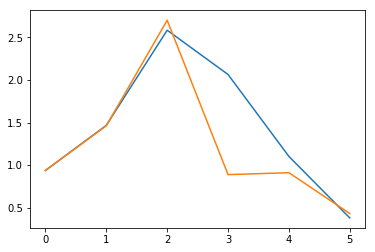

In [11]:
plt.plot(mae)
plt.plot(mae_no_online)
